<a href="https://colab.research.google.com/github/TenthEdict/ILS695/blob/main/psycinfo_keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: name 'model' is not defined

In [2]:
# install packages
!pip install bibtexparser
!pip install tomotopy
!pip install little_mallet_wrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.4.1-py3-none-any.whl size=43252 sha256=1d7a2fcb11155391a227e3d07aa13b0d254323b5c25131690d1931ecc7b075f0
  Stored in directory: /root/.cache/pip/wheels/08/c6/c3/56e639fab68d1fdbf13ea147636d9795ccdbd3c1d3178d1332
Successfully built bibtexparser
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 18.7 MB/s eta 0:00:00


In [3]:
# import libraries
import bibtexparser
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
all_punctuation = string.punctuation

In [5]:
# load data
with open("/content/drive/MyDrive/school/02 purdue/ILS 695/data/2024-02-29psycinfo_export_01.bib") as psycfile:
  bibtex_data = bibtexparser.load(psycfile)

In [43]:
type(bibtex_data.entries[0])
print(len(bibtex_data.entries))

15655


In [44]:
keywords = []


for entry in bibtex_data.entries:
  temp = entry['keywords'].split(',')
  keywords += temp

keywords_terms = [keyword for keyword in keywords if keyword != ' No terms assigned']

len(keywords_terms)

185765

Counter({' Business Organizations': 1394, ' Test Construction': 1214, ' Humans': 1121, ' Leadership': 1066, ' COVID-19': 988, ' Organizational Behavior': 783, ' Business': 762, ' Well Being': 666, ' Occupations': 655, ' Job Performance': 649, ' Employee Attitudes': 630, ' Industrial and Organizational Psychology': 610, ' Innovation': 602, ' Entrepreneurship': 576, ' Pandemics': 568, ' Female': 566, ' Management Personnel': 558, ' Organizations': 549, ' Male': 532, ' Motivation': 531, ' Working Conditions': 514, ' Adult': 462, ' Decision Making': 455, ' Mental Health': 451, ' Test Validity': 412, ' Models': 401, ' Stress': 396, ' Employee Engagement': 387, ' Human Resource Management': 386, ' Intervention': 373, ' Anxiety': 373, ' Human Sex Differences': 373, ' Occupational Stress': 365, ' Psychometrics': 364, ' Employment Status': 363, ' Job Satisfaction': 362, ' Emotions': 356, ' Economics': 352, ' Teams': 317, ' Theories': 307, ' Creativity': 303, ' College Students': 296, ' Policy M

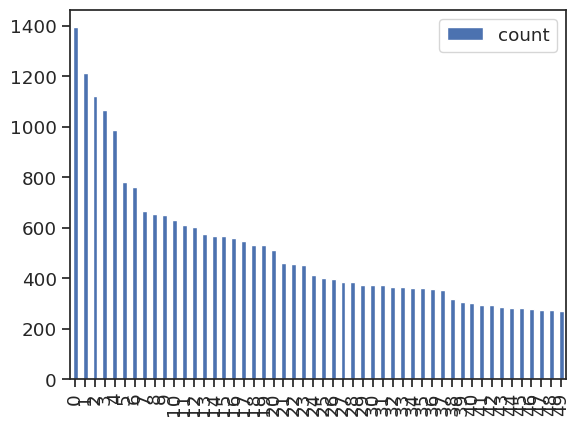

In [26]:
word_types = Counter(keywords_terms)
print(word_types)
freq = FreqDist(word_types)

df = pd.DataFrame(list(freq.most_common(50)))
df.columns = ['keyword', 'count']
df.plot(kind = 'bar')
print(df)

In [65]:
# find articles that have the top 50 keywords

articles_with_keywords = []

keyword_list = pd.DataFrame(list(freq.most_common(100)), columns = ['Keyword', 'Count'])

for entry in bibtex_data.entries:
  for keyword in keyword_list['Keyword']:
    if keyword in entry['keywords'] and entry not in articles_with_keywords:
      articles_with_keywords.append(entry)

len(articles_with_keywords)

13173

In [66]:
journals = []

for entry in articles_with_keywords:
  journals.append(entry['journal'])


In [67]:
journal_occurences = {}

for journal in journals:
  journal_occurences[journal] = journals.count(journal)

journal_occurences_df = pd.DataFrame.from_dict(journal_occurences, orient = "index", columns = ['Count']).sort_values("Count", ascending = False)

journals_cited_25 = journal_occurences_df[journal_occurences_df['Count'] > 25]
print(len(journals_cited_25))

87


In [68]:
selected_journal_entries = [entry for entry in bibtex_data.entries if entry['journal'] in journals_cited_25.index]
print(len(selected_journal_entries))

9079


In [69]:
selected_journal_abstracts = [entry.get('abstract') for entry in selected_journal_entries]
print(all(selected_journal_abstracts))

print(len(selected_journal_abstracts))

# lower each abstract if it isnt empty
journal_abstracts_lower = []
i = 0
for abstract in selected_journal_abstracts:
  try:
    journal_abstracts_lower.append(abstract.lower())
    i+=1
  except AttributeError:
    print(f"the abstract at {i} is empty")
    i+=1

# check if it worked
print(all(journal_abstracts_lower))

print(len(journal_abstracts_lower))

True
9079
True
9079


In [70]:
selected_abstracts_clean = [''.join(char for char in abstract if char not in string.punctuation) for abstract in journal_abstracts_lower]

In [71]:
selected_abstracts_joined = ''.join(selected_abstracts_clean)

abstract_words = selected_abstracts_joined.split()

word_types = Counter(abstract_words)

print(word_types)

ttr = (len(word_types)/len(abstract_words)) * 100
print(ttr)

word_tokens = nltk.word_tokenize(selected_abstracts_joined)

Counter({'the': 82318, 'and': 64519, 'of': 60275, 'to': 39029, 'in': 34552, 'a': 28302, 'that': 20843, 'on': 16676, 'we': 14851, 'for': 14469, 'with': 12322, 'is': 12082, 'this': 11594, 'as': 10596, 'all': 9925, 'record': 9503, 'by': 9114, 'c': 9066, 'rights': 8990, 'study': 8985, 'database': 8935, 'psycinfo': 8885, 'apa': 8882, 'are': 8019, 'from': 7267, 'an': 7140, 'their': 7114, 'research': 6983, 'work': 6972, 'between': 5978, 'how': 5156, 'our': 5033, 'was': 5030, 'were': 4835, 'social': 4667, 'more': 4596, 'results': 4561, 'be': 4504, 'these': 4494, '2022': 4477, 'which': 4185, 'performance': 4104, 'employees': 3984, 'job': 3928, 'relationship': 3828, 'can': 3800, 'have': 3751, 'has': 3728, 'findings': 3710, 'at': 3707, 'organizational': 3674, 'not': 3527, 'or': 3468, 'it': 3349, 'also': 3336, 'theory': 3171, 'leadership': 3147, 'effects': 3104, 'data': 3066, 'model': 3044, 'effect': 3038, 'when': 2995, 'using': 2771, 'positive': 2740, 'through': 2735, 'support': 2697, 'role': 268

In [72]:
abstracts_no_stopwords = [word for word in word_tokens if word not in stopwords.words('english')]

In [76]:
print(len(abstracts_no_stopwords))

1093557


In [81]:
abstracts_no_stopwords_plus = [word for word in abstracts_no_stopwords if word not in ['record', 'c', 'database', 'apa', 'psycinfo', 'rights', 'study', 'also', 'may']]

print(len(abstracts_no_stopwords_plus))

1024599


In [82]:
new_tokens = [word for word in abstracts_no_stopwords_plus if word.isalnum()]
print(len(new_tokens))

1003809


In [83]:
print(Counter(new_tokens))

Counter({'work': 6998, 'research': 6987, 'employees': 4998, 'social': 4672, 'results': 4562, '2022': 4477, 'performance': 4107, 'job': 3931, 'relationship': 3830, 'findings': 3715, 'organizational': 3675, 'theory': 3181, 'leadership': 3155, 'effects': 3104, 'data': 3068, 'model': 3052, 'effect': 3039, 'using': 2771, 'positive': 2740, 'support': 2701, 'role': 2681, 'studies': 2670, 'two': 2581, '2023': 2557, 'implications': 2356, 'management': 2272, 'analysis': 2239, 'negative': 2232, 'organizations': 2187, 'literature': 2175, 'article': 2126, 'firms': 2118, 'paper': 2092, 'behavior': 2087, 'related': 2087, 'time': 2025, 'however': 2025, 'different': 2023, 'employee': 1988, 'knowledge': 1985, 'outcomes': 1980, 'psychological': 1932, 'team': 1842, 'perceived': 1836, 'based': 1829, 'use': 1790, 'health': 1785, 'new': 1769, 'impact': 1762, 'high': 1725, 'process': 1722, 'business': 1698, 'found': 1690, 'ie': 1688, 'important': 1666, 'three': 1663, 'theoretical': 1644, 'associated': 1634, '

In [84]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in new_tokens]

print(Counter(lemmatized_words))

Counter({'work': 7092, 'research': 6998, 'employee': 6986, 'effect': 6143, 'relationship': 5443, 'result': 4977, 'social': 4672, '2022': 4477, 'job': 4203, 'performance': 4139, 'finding': 3907, 'theory': 3784, 'model': 3757, 'organizational': 3675, 'behavior': 3481, 'organization': 3244, 'firm': 3173, 'leadership': 3159, 'analysis': 3139, 'role': 3125, 'data': 3068, 'individual': 3065, 'level': 2952, 'support': 2844, 'using': 2771, 'positive': 2742, 'process': 2734, 'study': 2691, 'team': 2673, 'leader': 2597, 'two': 2581, '2023': 2557, 'article': 2451, 'implication': 2398, 'practice': 2386, 'change': 2351, 'literature': 2328, 'management': 2292, 'outcome': 2276, 'time': 2270, 'resource': 2263, 'negative': 2233, 'paper': 2209, 'experience': 2159, 'factor': 2124, 'impact': 2087, 'related': 2087, 'group': 2066, 'however': 2025, 'different': 2023, 'influence': 2009, 'knowledge': 1990, 'context': 1948, 'sample': 1939, 'business': 1937, 'psychological': 1932, 'approach': 1884, 'perceived': 

              word  count
0             work   7092
1         research   6998
2         employee   6986
3           effect   6143
4     relationship   5443
5           result   4977
6           social   4672
7             2022   4477
8              job   4203
9      performance   4139
10         finding   3907
11          theory   3784
12           model   3757
13  organizational   3675
14        behavior   3481
15    organization   3244
16            firm   3173
17      leadership   3159
18        analysis   3139
19            role   3125
20            data   3068
21      individual   3065
22           level   2952
23         support   2844
24           using   2771
25        positive   2742
26         process   2734
27           study   2691
28            team   2673
29          leader   2597


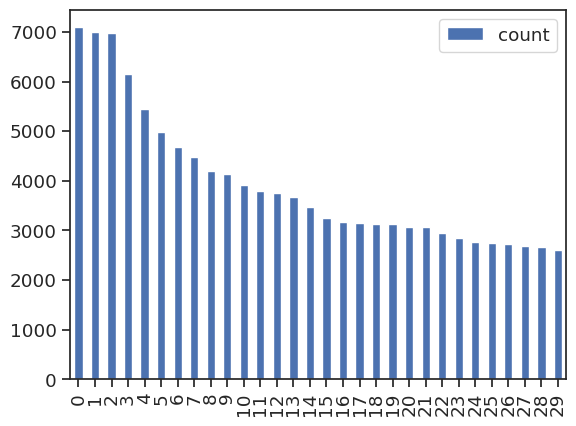

In [85]:
new_freq = FreqDist(lemmatized_words)

df = pd.DataFrame(list(new_freq.most_common(30)))
df.columns = ['word', 'count']
df.plot(kind = 'bar')
print(df)